In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts 
import matplotlib.pyplot as plt
ds = pd.read_csv('test.csv')


In [10]:
def _preprocess():
    mean_pressure = ds['BloodPressure'].mean()
    ds['BloodPressure'].fillna(mean_pressure, inplace=True)

    mode_insulin = ds.loc[ds['Insulin'] != 0, 'Insulin'].mode()[0]
    ds['Insulin'].replace({0: None}, inplace=True)
    ds['Insulin'].fillna(mode_insulin, inplace=True)

    median_bmi = ds['BMI'].median()
    ds['BMI'].fillna(median_bmi, inplace=True)

    ds.drop_duplicates(inplace=True)
    
    return ds

In [31]:
def _pcorr(F1, F2):
    corr = F1.corr(F2)
    return corr

In [22]:
def _manual_corr(x, y):
    mean_x = x.mean()
    mean_y = y.mean()

    above = ((x - mean_x) * (y - mean_y)).sum()
    
    under_x = ((x - mean_x) ** 2).sum()
    under_y = ((y - mean_y) ** 2).sum()

    corr = above / (under_x ** 0.5 * under_y ** 0.5)
    return corr


In [34]:
def _corr():
    corr_age_pressure = _manual_corr(ds['Age'],ds['BloodPressure'])
    print(corr_age_pressure)
    # corr_age_bmi = _manual_corr(ds['Age'],ds['BMI'])
    # corr_pressure_bmi = _manual_corr(ds['BloodPressure'],ds['BMI'])
    # corr_coefficients = {
    #     corr_age_pressure: ('Age', 'BloodPressure'),
    #     corr_age_bmi: ('Age', 'BMI'),
    #     corr_pressure_bmi: ('BloodPressure', 'BMI')
    # }

    # max_corr = max(corr_coefficients.keys())
    # max_corr_names = corr_coefficients[max_corr]

    # return f"{max_corr:.3f}", max_corr_names


In [35]:
_corr()

0.23900477484443947


In [5]:
def _scatter():
    _, max_corr_names = _corr()
    
    axis1, axis2 = max_corr_names
    plt.scatter(ds[axis1], ds[axis2])
    plt.xlabel(axis1)
    plt.ylabel(axis2)
    plt.grid(True)
    plt.show()

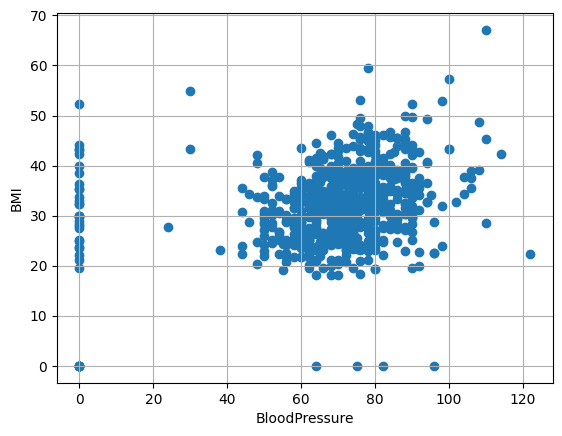

In [9]:
_scatter()

In [6]:
def _column():
    count_below_30 = ds[ds['Age'] < 30]['Age'].count()
    count_30_to_60 = ds[(ds['Age'] >= 30) & (ds['Age'] <= 60)]['Age'].count()
    count_above_60 = ds[ds['Age'] > 60]['Age'].count()
    
    categories = ['<30', '30-60', '60<']
    counts = [count_below_30, count_30_to_60, count_above_60]

    plt.bar(categories, counts, color=['red', 'blue', 'yellow'])
    plt.xlabel('Age Groups')
    plt.ylabel('Count')
    plt.title('Age Distribution')
    plt.show()

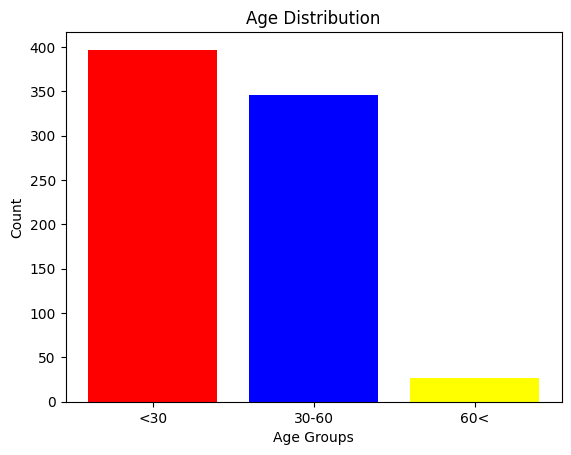

In [10]:
_column()